In [1]:
import matplotlib.pyplot as plt
import numpy as np
from scipy import signal

In [2]:
# 计算 DTFT
n = np.arange(-16,17)
n = np.mat(n)
xn = np.cos(np.pi*n/8)
omega = np.arange(0, 2*np.pi, 2*np.pi/1000)
X = xn * np.exp(-1j*n.T*omega)
X = X.T

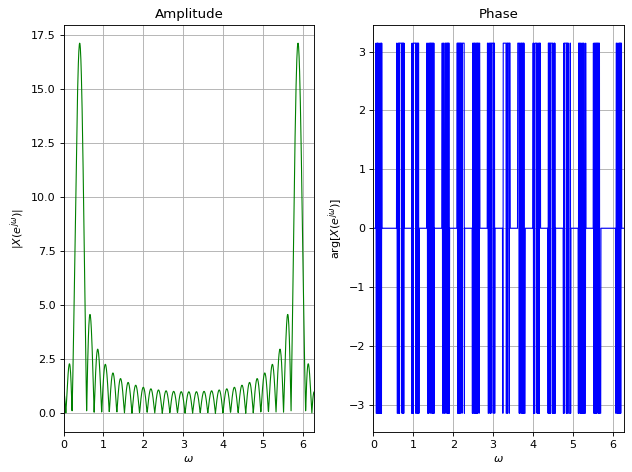

In [3]:
# 绘制幅频特性和相频特性曲线
plt.figure(figsize=(8, 6), dpi=80)

plt.subplot(121)
plt.plot(omega, np.abs(X), 'g', linewidth=1.0)
plt.xlim(0, 2*np.pi)
plt.grid()
plt.xlabel('$\omega$')
plt.ylabel('$|X(e^{j\omega})|$')
plt.title('Amplitude')

plt.subplot(122)
plt.plot(omega, np.angle(X), 'b', linewidth=1.0)
plt.xlim(0, 2*np.pi)
plt.grid()
plt.xlabel('$\omega$')
plt.ylabel('$\mathrm{arg}[X(e^{j\omega})]$')
plt.title('Phase')

plt.tight_layout()
plt.show()

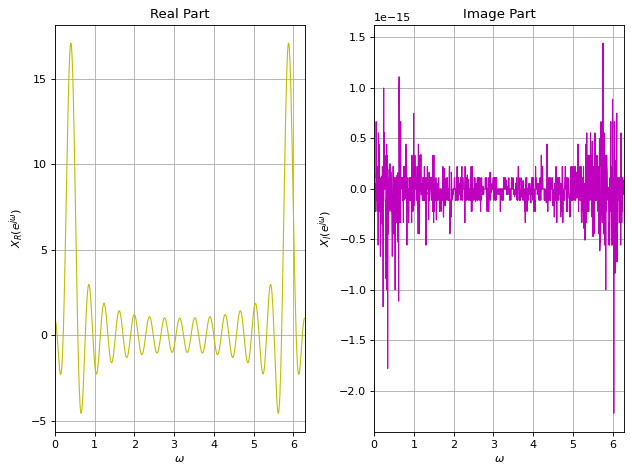

In [4]:
# 绘制实部和虚部曲线
plt.figure(figsize=(8, 6), dpi=80)

plt.subplot(121)
plt.plot(omega, np.real(X), 'y', linewidth=1.0)
plt.xlim(0, 2*np.pi)
plt.grid()
plt.xlabel('$\omega$')
plt.ylabel('$X_R(e^{j\omega})$')
plt.title('Real Part')

plt.subplot(122)
plt.plot(omega, np.imag(X), 'm', linewidth=1.0)
plt.xlim(0, 2*np.pi)
plt.grid()
plt.xlabel('$\omega$')
plt.ylabel('$X_I(e^{j\omega})$')
plt.title('Image Part')

plt.tight_layout()
plt.show()

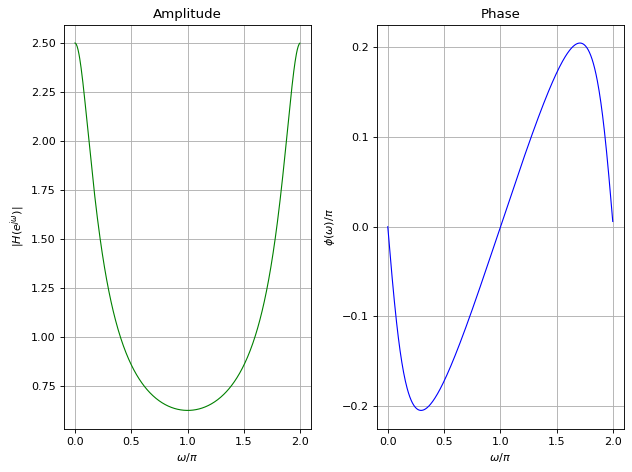

In [5]:
# 幅频特性和相频特性
a = np.array([1,-0.6])
b = np.array([1, 0])

omega, H = signal.freqz(b, a, whole=True)

plt.figure(figsize=(8, 6), dpi=80)

plt.subplot(121)
plt.plot(omega/np.pi, np.abs(H), 'g', linewidth=1.0)
plt.grid()
plt.xlabel('$\omega/\pi$')
plt.ylabel('$|H(e^{j\omega})|$')
plt.title('Amplitude')

plt.subplot(122)
plt.plot(omega/np.pi, np.angle(H)/np.pi, 'b', linewidth=1.0)
plt.grid()
plt.xlabel('$\omega/\pi$')
plt.ylabel('$\phi(\omega)/\pi$')
plt.title('Phase')

plt.tight_layout()
plt.show()

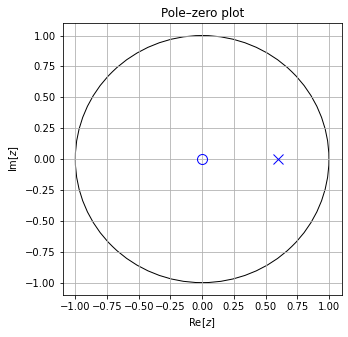

In [6]:
# 零极点分布图
from matplotlib.patches import Circle

z, p, k = signal.tf2zpk(b, a) # 求极点零点

fig, ax = plt.subplots(figsize=(5,5))
circle = Circle(xy=(0.0, 0.0), radius=1, fill=False, color='black')
ax.add_patch(circle)

plt.plot(p.real, p.imag, 'bx', markersize=10)
plt.plot(z.real, z.imag, 'o', markersize=10, color='none', markeredgecolor='b')
plt.grid()

r = 1.1 * np.amax(np.concatenate((abs(z), abs(p), [1]))) # z, p 模值和 1 的最大值乘以 1.1
plt.xlabel('$\mathrm{Re}[z]$')
plt.ylabel('$\mathrm{Im}[z]$')
plt.title('Pole–zero plot')
plt.axis([-r, r, -r, r])
plt.show()

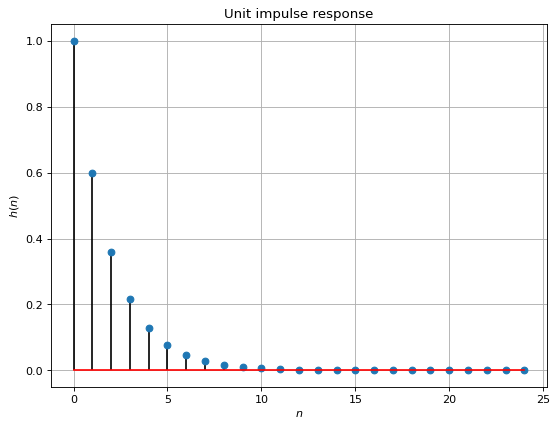

In [7]:
# 单位脉冲响应
n, h = signal.dimpulse((b,a,1),n=25)
plt.figure(figsize=(8, 6), dpi=80)
plt.stem(n, np.squeeze(h), linefmt='black',  basefmt='r-', markerfmt="C0o")
plt.grid()
plt.xlabel('$n$')
plt.ylabel('$h(n)$')
plt.title('Unit impulse response')
plt.show()